In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_798.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2592.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_318.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_207.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2248.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2733.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2791.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2393.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_106.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2986.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_707.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_756.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1199.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1758.jpg
/kaggle/input/alzheimer-mr

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory

from sklearn.svm import SVC

In [83]:
!pip install git+https://github.com/jfilter/split-folders.git

  Cloning https://github.com/jfilter/split-folders.git to /tmp/pip-req-build-v17tfbv7
  Running command git clone --filter=blob:none --quiet https://github.com/jfilter/split-folders.git /tmp/pip-req-build-v17tfbv7
  Resolved https://github.com/jfilter/split-folders.git to commit c566dbd56a1097e1ddba2de5dfb93bd67eade54f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [84]:
import splitfolders

input_folder='/kaggle/input/alzheimer-mri-dataset/Dataset'

output_folder='/kaggle/working/Splitted'

train_ratio=0.8
validation_ratio=0.1
test_ratio=0.1
splitfolders.ratio(input_folder, output_folder, seed=42,
                   ratio=(train_ratio,
                          validation_ratio,
                          test_ratio))

Copying files: 6400 files [00:11, 541.61 files/s] 


In [85]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE=16
IMG_SIZE=(128,128)
SEED=1345

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0,
                                zoom_range=0.2)

validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


#Defining directories for train,validation,test 
train_dir = '/kaggle/working/Splitted/train'
validation_dir = '/kaggle/working/Splitted/val'
test_dir = '/kaggle/working/Splitted/test'


#Defining generatores for train,validation,test

train_generator=train_datagen.flow_from_directory(
    train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical',)

# Define generator for test set using flow_from_directory
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size =64,
        class_mode ='categorical',
)


Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


In [86]:
class_names=list(train_generator.class_indices.keys())
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


In [87]:
train_generator


(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


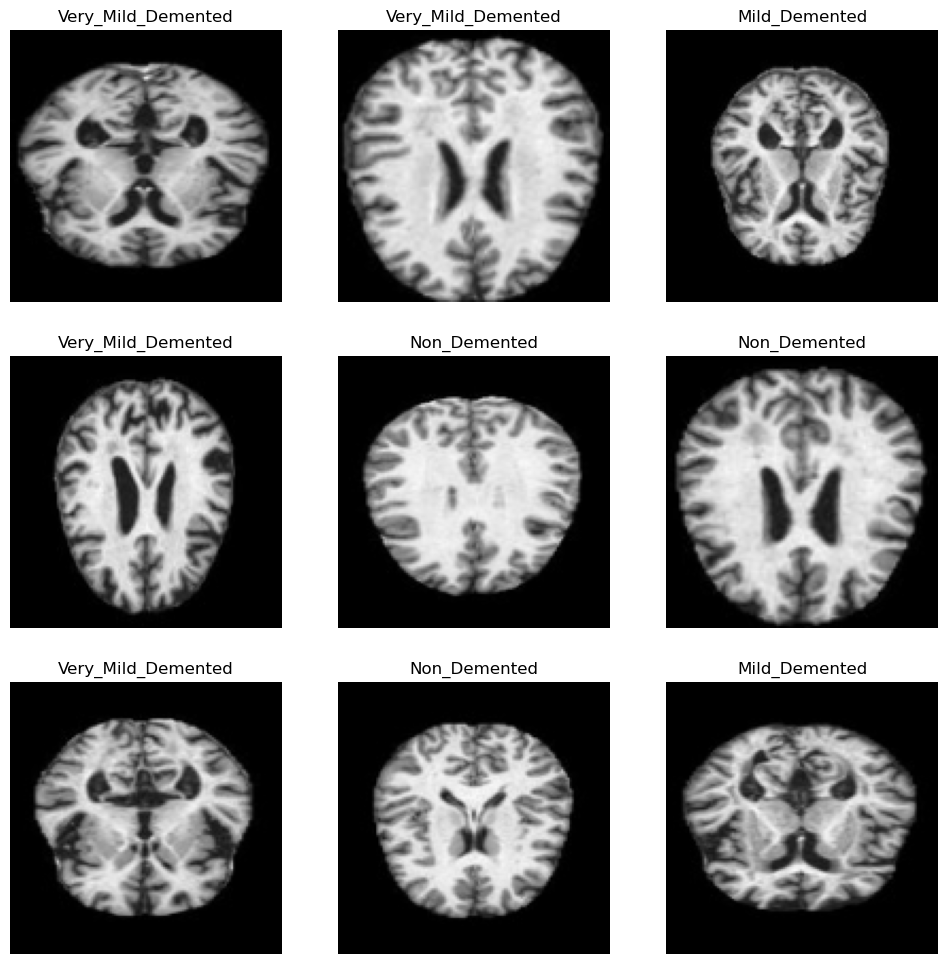

In [88]:
plt.figure(figsize=(12,12))

for images,labels in train_generator:
#     print(images)
#     print(len(labels))
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        print(images[i].shape)
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break

# Moving towards Data Augmentation


In [89]:
def data_augmentar():
    data_augmentation = Sequential()
    data_augmentation.add(RandomRotation(factor=(-0.15, 0.15)))
    data_augmentation.add(RandomZoom((-0.3, -0.1)))
    return data_augmentation

In [90]:
data_augmentation = data_augmentar()
assert(data_augmentation.layers[0].name.startswith('random_rotation'))
assert(data_augmentation.layers[0].factor == (-0.15, 0.15))
assert(data_augmentation.layers[1].name.startswith('random_zoom'))
assert(data_augmentation.layers[1].height_factor == (-0.3, -0.1))

# Visualzing Imbalance

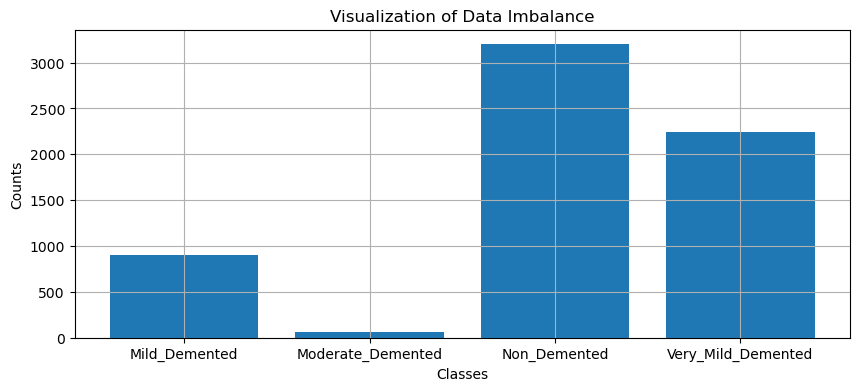

In [91]:
input_folder='/kaggle/input/alzheimer-mri-dataset/Dataset'

class_count=dict()

for i in class_names:
    class_count[i]=len(os.listdir(input_folder+'/'+i))

plt.figure(figsize=(10,4))
plt.bar(class_count.keys(),class_count.values())

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Visualization of Data Imbalance')
plt.grid(True)
plt.show()

In [92]:
total_samples=sum(class_count.values())

for i in range(4):
    class_weight = round(total_samples / (4 * list(class_count.values())[i]), 2)
    print(f'Weight for class \"{class_names[i]}\" : {class_weight}')

Weight for class "Mild_Demented" : 1.79
Weight for class "Moderate_Demented" : 25.0
Weight for class "Non_Demented" : 0.5
Weight for class "Very_Mild_Demented" : 0.71


# Model Creation

## Extracting images features with the help of VGG-19

In [93]:
input_shape = (128,128, 3)

#Create an instance of the VGG19 model
vgg19 = VGG19(include_top=False, input_shape=input_shape,
                   weights='imagenet')

train_features = vgg19.predict(train_generator, steps=len(train_generator), verbose=1)
val_features=vgg19.predict(validation_generator,len(validation_generator),verbose=1)
test_features = vgg19.predict(test_generator, steps=len(test_generator), verbose=1)

11/11 [==============================] - 73s 7s/step


In [94]:
train_labels=train_generator.classes
val_labels=validation_generator.classes
test_label=test_generator.classes

In [95]:
trainval_features = np.concatenate((train_features, val_features))
trainval_labels = np.concatenate((train_labels, val_labels))

In [96]:
trainval_features.shape

(5758, 4, 4, 512)

In [97]:
X_train_2d = trainval_features.reshape(trainval_features.shape[0], -1)

In [98]:
X_test_2d = test_features.reshape(test_features.shape[0], -1)

In [99]:
X_test_2d.shape

(642, 8192)

In [100]:
train_labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

# PCA

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA()

In [102]:
X_pca = pca.fit_transform(X_train_2d)

In [103]:
#Determine the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

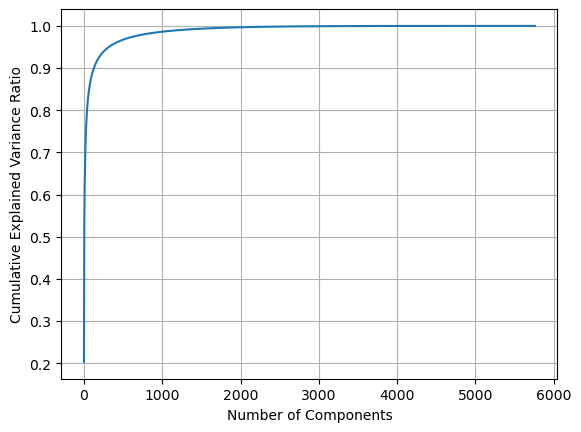

In [104]:
# Plot the cumulative explained variance ratio
import matplotlib.pyplot as plt
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [105]:
# Choose the number of components that capture a significant portion of variance (90%)
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.9) + 1

In [106]:
selected_features = X_pca[:, :n_components]

In [107]:
selected_features.shape

(5758, 128)

In [108]:
X_train=selected_features

In [109]:
trainval_labels.shape

(5758,)

In [110]:
indices = np.random.permutation(5758)

# Shuffle X_train and X_labels using the same indices
shuffled_X_train = X_train[indices]
shuffled_X_labels = trainval_labels[indices]

# XGB

In [111]:
import xgboost as xgb

In [112]:
xgb = xgb.XGBClassifier(n_estimators=150,max_depth=5,learning_rate=0.01)
xgb.fit(shuffled_X_train, shuffled_X_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [113]:
X_test=pca.transform(X_test_2d)

In [114]:
X_test=X_test[:, :n_components]

In [115]:
X_test.shape

(642, 128)

In [116]:
test_label.shape

(642,)

In [117]:
xgb.score(X_test,test_label)

0.5

In [118]:
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions on the test data
y_pred = xgb.predict(X_test)

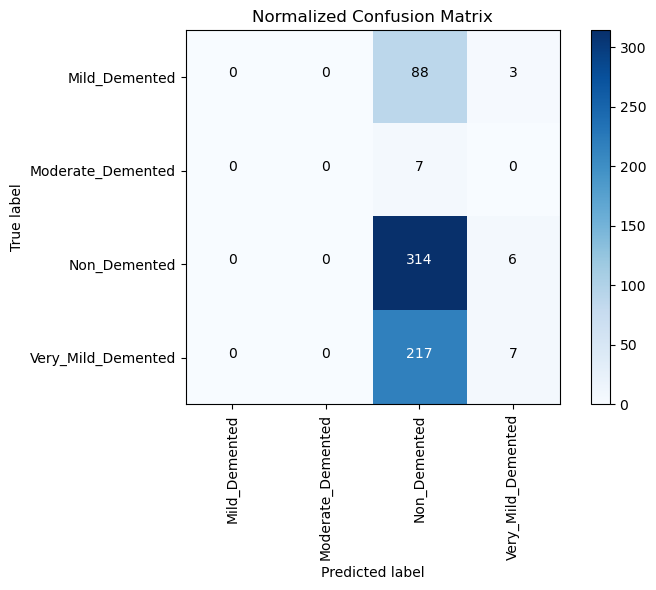

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix"

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
#     '.2f' if normalize else 
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_label, y_pred)

class_names

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, class_names, normalize=True)
plt.show()


In [120]:
# Compute the classification report
report = classification_report(test_label, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00         7
           2       0.50      0.98      0.66       320
           3       0.44      0.03      0.06       224

    accuracy                           0.50       642
   macro avg       0.23      0.25      0.18       642
weighted avg       0.40      0.50      0.35       642



In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
gnb = GaussianNB()
gnb.fit(shuffled_X_train, shuffled_X_labels)

GaussianNB()

In [123]:
gnb.score(X_test,test_label)

0.4423676012461059

In [124]:
y_pred = gnb.predict(X_test)

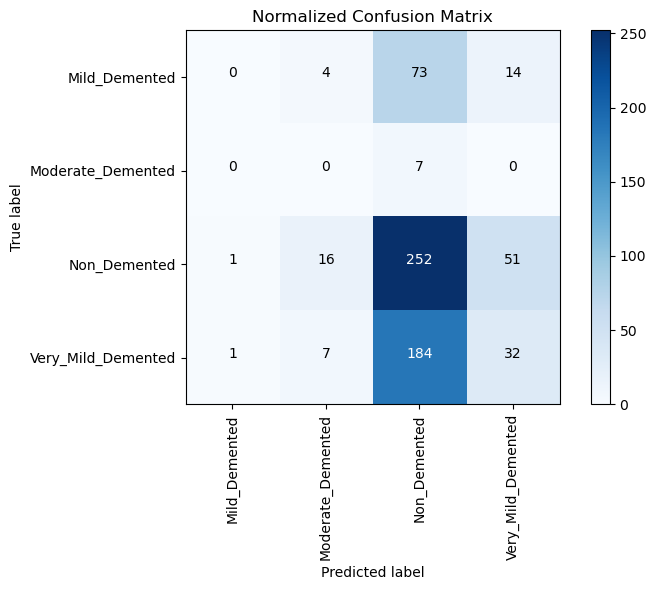

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix"

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
#     '.2f' if normalize else 
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_label, y_pred)

class_names

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, class_names, normalize=True)
plt.show()


In [126]:
# Compute the classification report
report = classification_report(test_label, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00         7
           2       0.49      0.79      0.60       320
           3       0.33      0.14      0.20       224

    accuracy                           0.44       642
   macro avg       0.20      0.23      0.20       642
weighted avg       0.36      0.44      0.37       642



In [127]:
from sklearn.svm import SVC

In [128]:
svc = SVC()
svc.fit(shuffled_X_train, shuffled_X_labels)

SVC()

In [129]:
svc.score(X_test,test_label)

0.4937694704049844

In [130]:
y_pred = svc.predict(X_test)

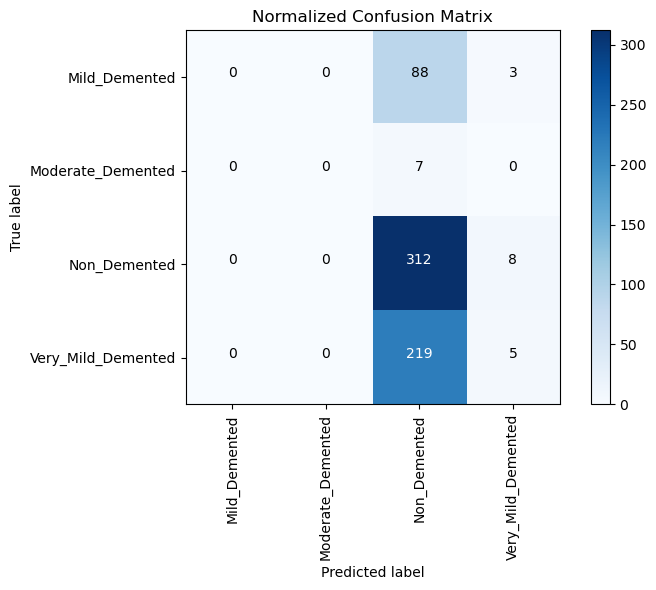

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix"

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
#     '.2f' if normalize else 
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_label, y_pred)

class_names

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, class_names, normalize=True)
plt.show()


In [132]:
# Compute the classification report
report = classification_report(test_label, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00         7
           2       0.50      0.97      0.66       320
           3       0.31      0.02      0.04       224

    accuracy                           0.49       642
   macro avg       0.20      0.25      0.18       642
weighted avg       0.36      0.49      0.34       642

